# GRIP @ SPARKS FOUNDATION

# Author: Riya Chauhan

# Prediction using Decision Tree algorithm

In this Section we will see how to Implement and Evaluate Decision Tree classifiers

For this decision tree implementation we will use the iris dataset from sklearn which is relatively simple to understand and is easy to implement. The good thing about the Decision Tree classifier from scikit-learn is that the target variables can be either categorical or numerical.

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import plotly.express as px
from sklearn.model_selection import GridSearchCV

# Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop(['Id'],axis=1,inplace=True)


# Exploratory Data Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_7868\2699745944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

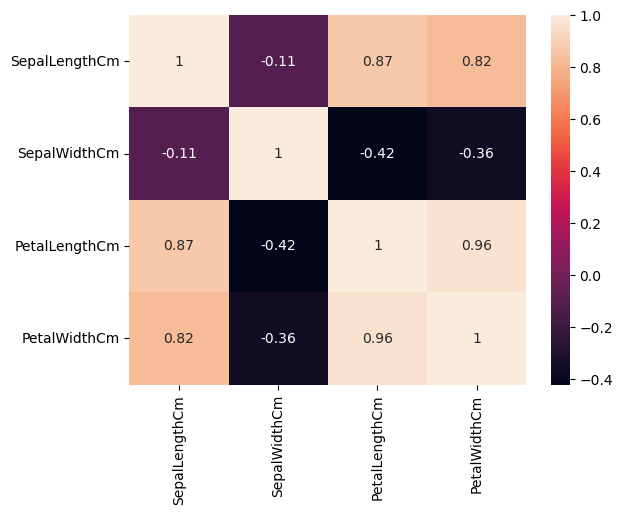

In [5]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [6]:
print(pd.unique(df['Species']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.shape

(150, 5)

In [10]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='Species', ylabel='count'>

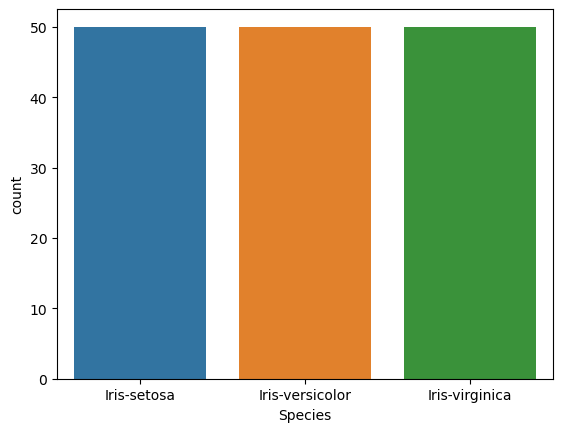

In [13]:

import seaborn as sns
sns.countplot(x='Species', data=df)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

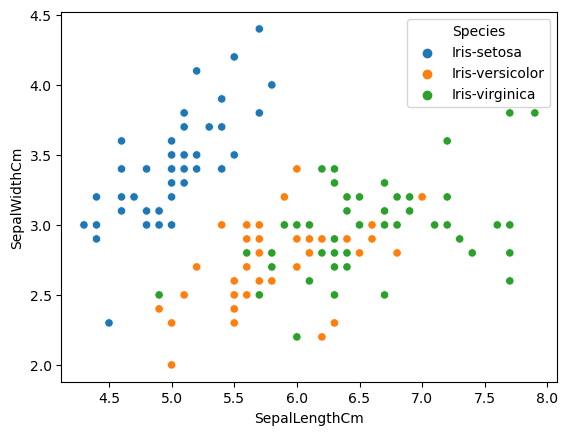

In [14]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

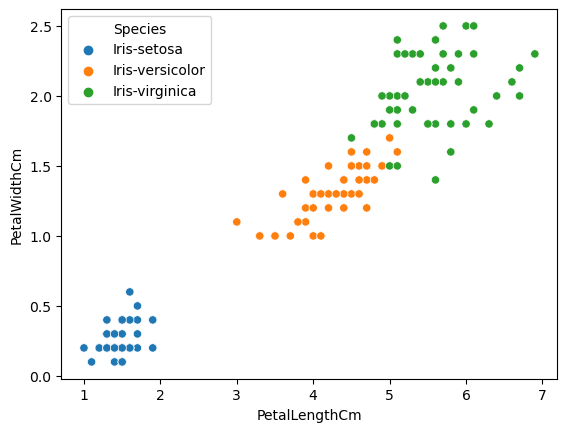

In [15]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

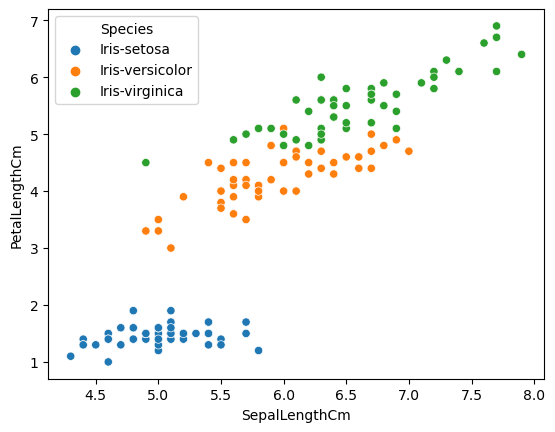

In [16]:
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

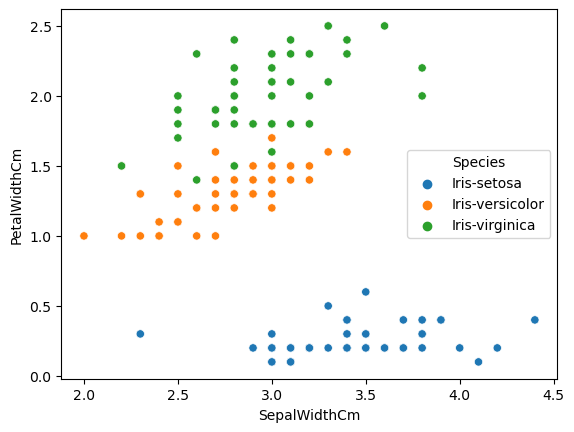

In [17]:
sns.scatterplot(data=df, x="SepalWidthCm", y="PetalWidthCm", hue="Species")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

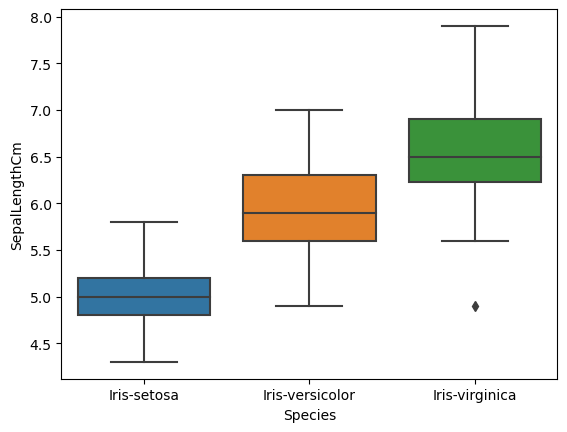

In [18]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

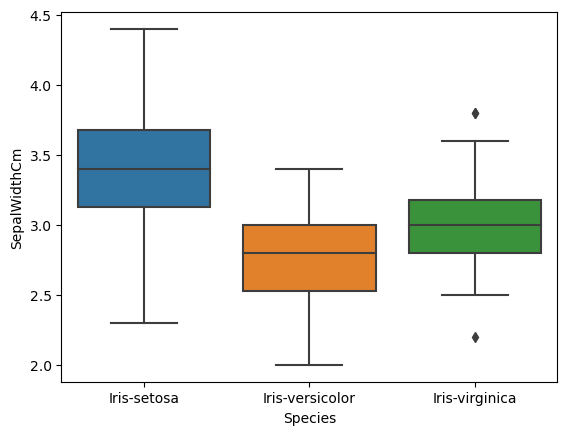

In [19]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

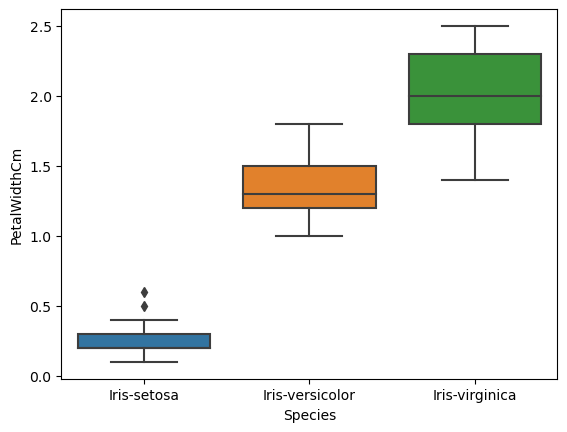

In [20]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

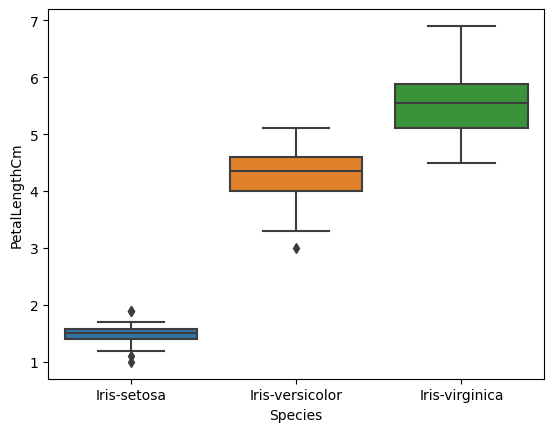

In [21]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)

In [22]:
C=df['Species'].unique().tolist()



Text(0, 0.5, 'Frequency')

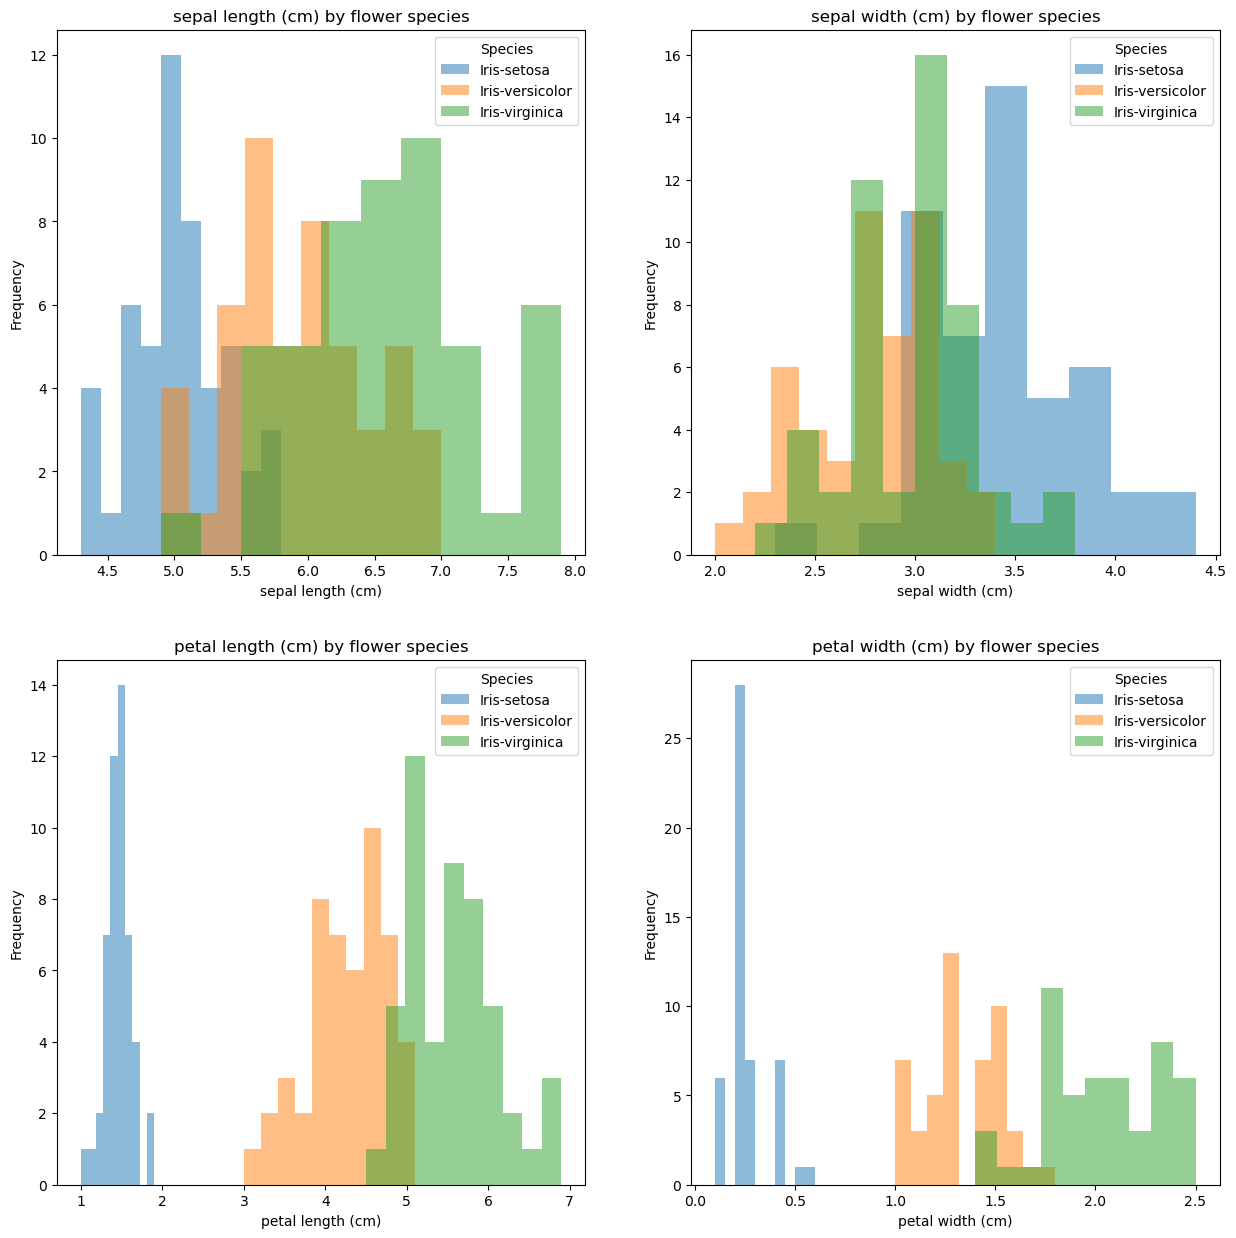

In [23]:
fig, ax = plt.subplots(2,2, figsize = (15,15))

for x in C: 
    ax[0,0].hist(df[df.Species == x]["SepalLengthCm"], alpha = 0.5)
    ax[0,1].hist(df[df.Species == x]["SepalWidthCm"], alpha = 0.5)
    ax[1,0].hist(df[df.Species == x]["PetalLengthCm"],alpha = 0.5)
    ax[1,1].hist(df[df.Species == x]["PetalWidthCm"], alpha = 0.5)

ax[0,0].legend(labels = C, title = "Species")
ax[0,0].set_title("sepal length (cm) by flower species")
ax[0,0].set_xlabel("sepal length (cm)")
ax[0,0].set_ylabel("Frequency")

ax[0,1].legend(labels = C, title = "Species")
ax[0,1].set_title("sepal width (cm) by flower species")
ax[0,1].set_xlabel("sepal width (cm)")
ax[0,1].set_ylabel("Frequency")

ax[1,0].legend(labels =C, title = "Species")
ax[1,0].set_title("petal length (cm) by flower species")
ax[1,0].set_xlabel("petal length (cm)")
ax[1,0].set_ylabel("Frequency")

ax[1,1].legend(labels = C, title = "Species")
ax[1,1].set_title("petal width (cm) by flower species")
ax[1,1].set_xlabel("petal width (cm)")
ax[1,1].set_ylabel("Frequency")

# Train-Test split

In [24]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values # independent variable
y = df['Species'].values # dependent variable

In [25]:
print(np.shape(X))
print(np.shape(y))

(150, 4)
(150,)


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


# Decision Tree

In [27]:
#dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(random_state =42)
tp=[{'max_depth': [2,3,4], 'min_samples_split': [1,2,3,4,5], 'criterion' :['gini', 'entropy']}]
grid_s = GridSearchCV(estimator=dt, param_grid=tp, cv=5, verbose=True)
grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4],
                          'min_samples_split': [1, 2, 3, 4, 5]}],
             verbose=True)

In [29]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=1, random_state=42)
                        
dt.fit(X_train, y_train)
dtp = dt.predict(X_test)



In [30]:
f = grid_s.best_estimator_
f

DecisionTreeClassifier(max_depth=3, min_samples_split=1, random_state=42)

# Feature Importance

The ability to determine the feature importance is another helpful aspect of decision trees offered by sklearn. This is the overall amount by which splits over a certain characteristic cause the Gini index, also known as the entropy index (gini in our instance), to fall.

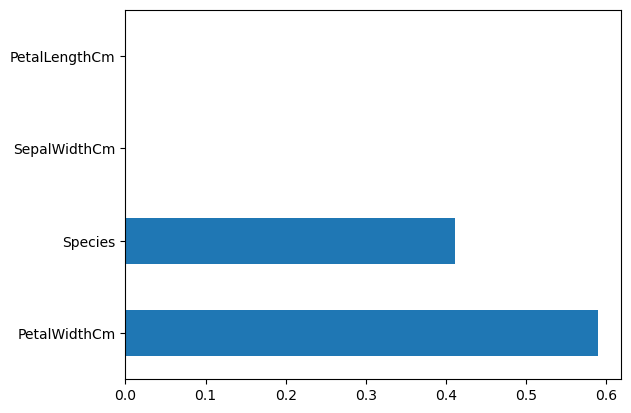

In [32]:
wc=df.columns[1:5]
feat_imp = pd.Series(dt.feature_importances_,index= wc)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [33]:
import numpy as np
importance = pd.DataFrame({'feature': wc, 'importance' : np.round(dt.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

         feature  importance
2   PetalWidthCm       0.589
3        Species       0.411
0   SepalWidthCm       0.000
1  PetalLengthCm       0.000


[Text(0.375, 0.875, 'PetalWidthCm <= 2.45\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]\nclass = Iris-virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.625, 'Species <= 1.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]\nclass = Iris-virginica'),
 Text(0.25, 0.375, 'PetalWidthCm <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'gini = 0.117\nsamples = 32\nvalue = [0, 30, 2]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'PetalWidthCm <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = Iris-virginica')]

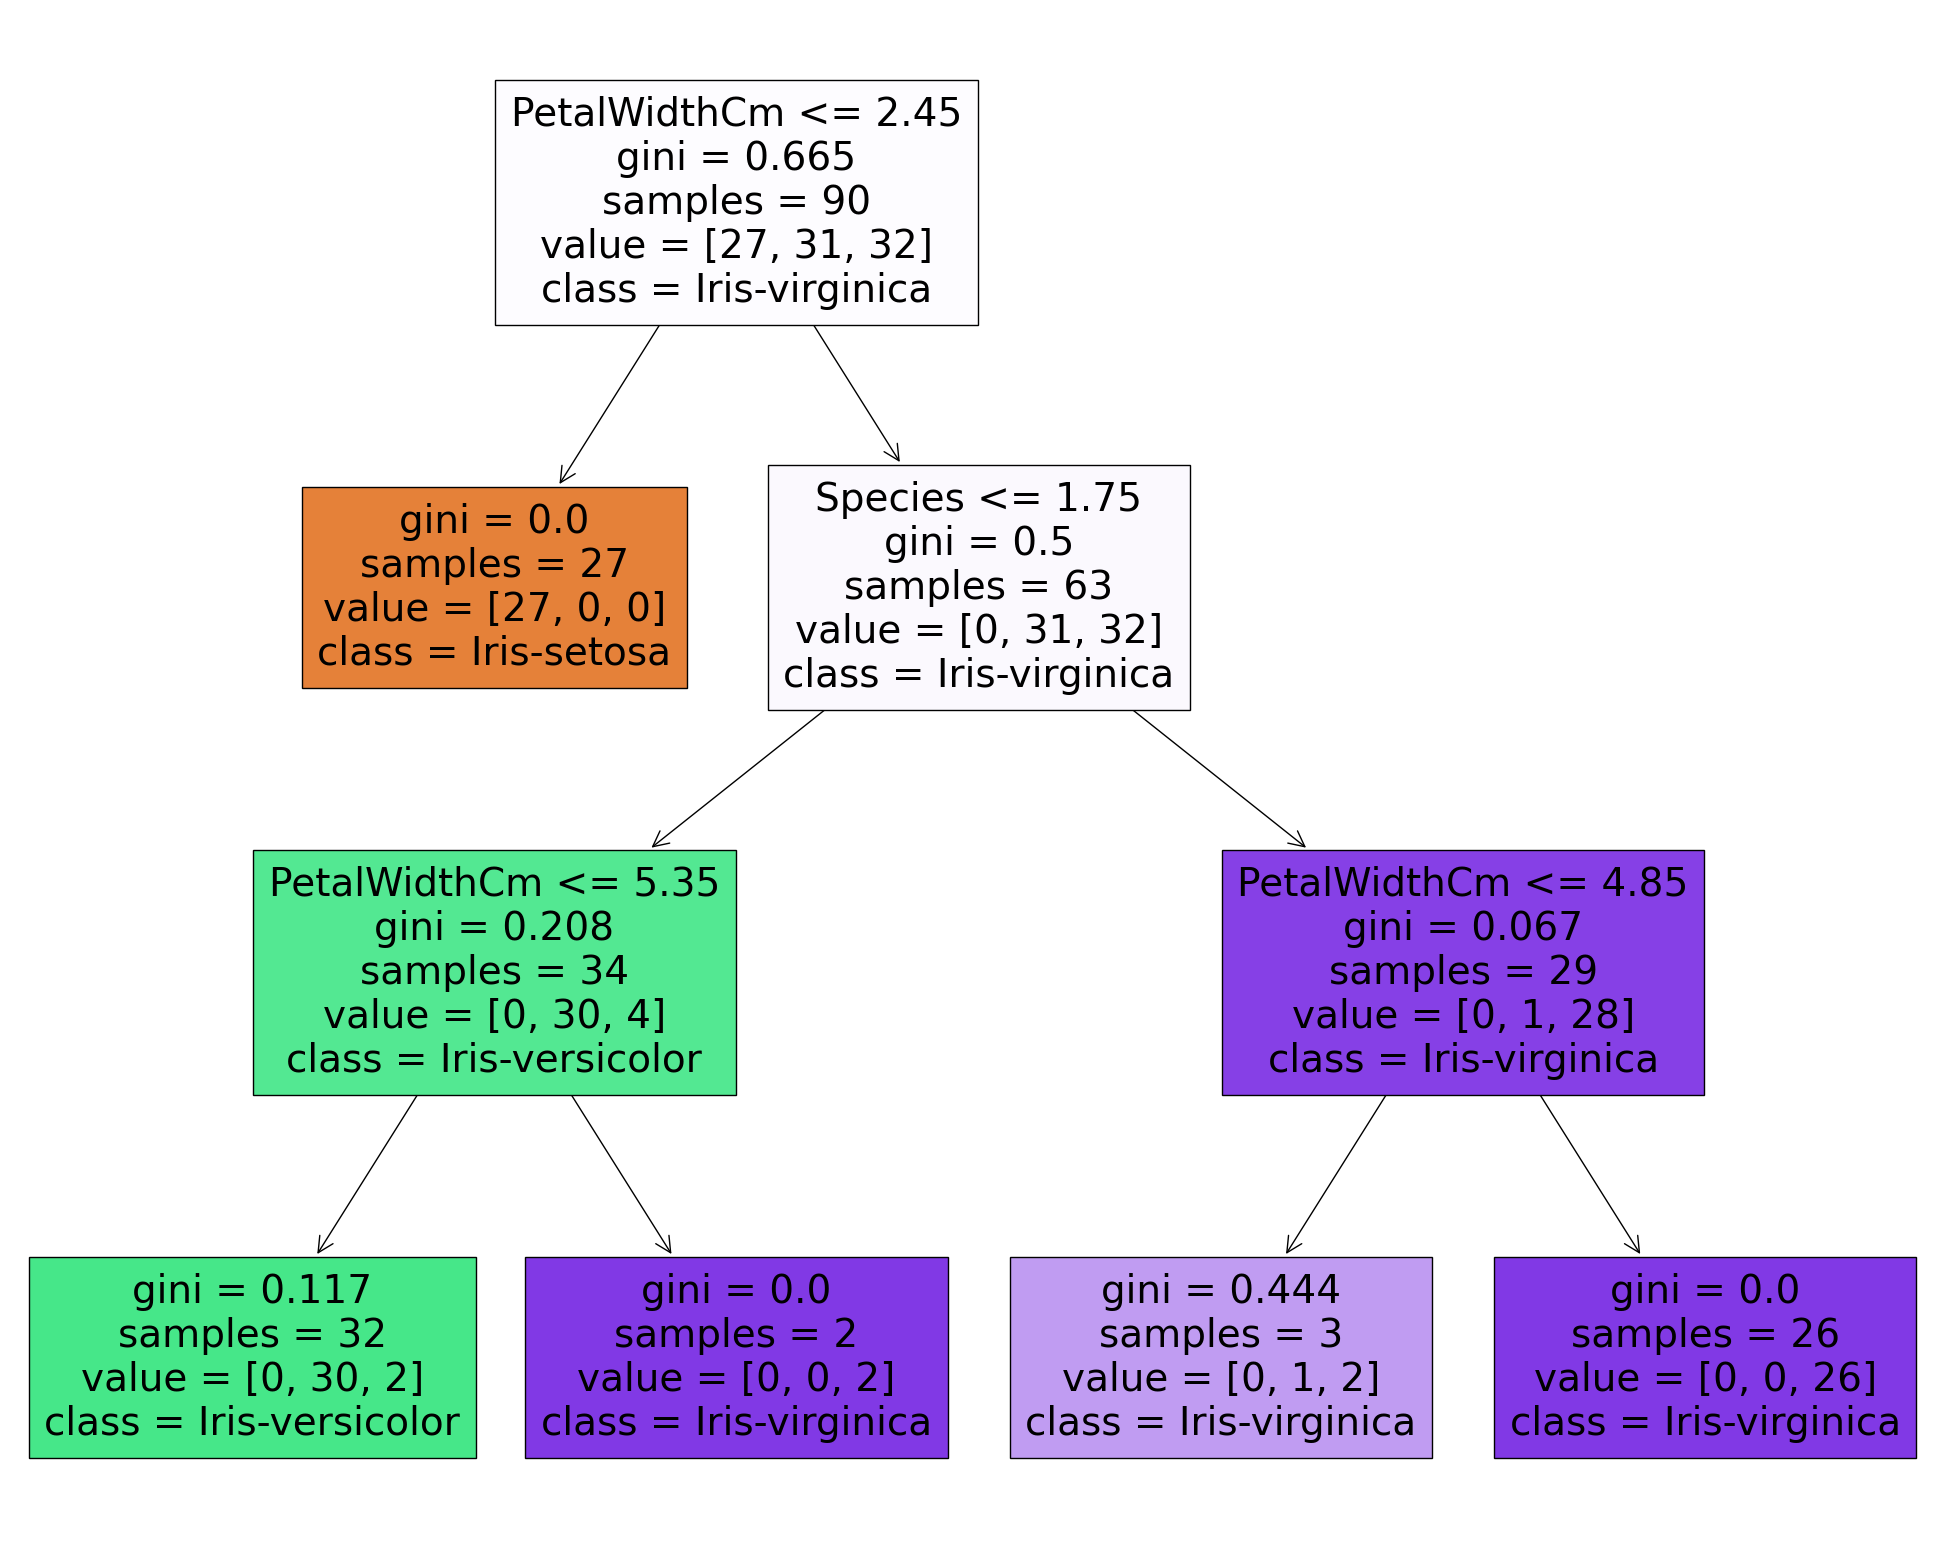

In [34]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=df.columns[1:5],class_names= C,filled=True)

# Accuracy of the model

In [35]:
print('Accuracy sore',accuracy_score(y_test, dtp)*100)


Accuracy sore 98.33333333333333


#  Precision of the model

In [36]:
precision=precision_score(y_test, dtp, average=None) 
pr=pd.DataFrame(precision, index=C)
pr.rename(columns={0:'Precision'}, inplace =True)
pr

,Precision
Iris-setosa,1.00
Iris-versicolor,0.95
Iris-virginica,1.00


# Recall of the model

In [37]:
recall = recall_score(y_test, dtp, average =None)
recall_results = pd.DataFrame(recall, index= C)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
Iris-setosa,1.000000
Iris-versicolor,1.000000
Iris-virginica,0.944444


# f1-score of the model

In [38]:
f1 = f1_score(y_test, dtp, average=None)
f1_results = pd.DataFrame(f1, index=C)
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
Iris-setosa,1.000000
Iris-versicolor,0.974359
Iris-virginica,0.971429
